In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from statsmodels.stats.anova import AnovaRM
import pylab

In [2]:
data = pd.read_excel('../Data/Harvest/2021 Nxwater exp Akron Harvest data.xlsx', 
                     sheet_name='2021 Nxwater Yield calculations', engine='openpyxl')
data = data[data['Block'] > 0]
data.head()

,Block,Water Trt,N Trt,Plot,Grain Wt (g),% Moisture Content (MC),Moisture as decimal,lb/bu,Weight (g) 0% MC,Weight (g) 15.5% MC,...,"Grain Yield, 0% MC kg/ha","Grain Yield, 15.5% MC kg/ha","Annual ET, mm",Water trt target,N trt target,Unnamed: 21,water trt codes,targets,N trt codes,targets.1
0,1.0,1.0,4.0,1.0,5644.1,12.2,0.122,58.6,4955.5198,5723.625369,...,10668.154239,12321.718146,NaN,100.0,155.0,NaN,1.0,100.0,1.0,20.0
1,1.0,1.0,1.0,2.0,3816.1,13.6,0.136,57.7,3297.1104,3808.162512,...,7097.960196,8198.144026,NaN,100.0,20.0,NaN,2.0,70.0,2.0,65.0
2,1.0,1.0,5.0,3.0,6791.8,13.5,0.135,59.0,5874.9070,6785.517585,...,12647.394531,14607.740683,NaN,100.0,200.0,NaN,NaN,NaN,3.0,110.0
3,1.0,1.0,3.0,4.0,5572.7,15.6,0.156,58.6,4703.3588,5432.379414,...,10125.306556,11694.729072,NaN,100.0,110.0,NaN,NaN,NaN,4.0,155.0
4,1.0,1.0,2.0,5.0,4415.3,15.4,0.154,58.2,3735.3438,4314.322089,...,8041.381208,9287.795295,NaN,100.0,65.0,NaN,NaN,NaN,5.0,200.0


In [3]:
data.columns.values

array(['Block', 'Water Trt', 'N Trt', 'Plot', ' Grain Wt (g)',
       '% Moisture Content (MC)', 'Moisture as decimal', 'lb/bu',
       'Weight (g) 0% MC', 'Weight (g) 15.5% MC', 'Weight (kg) 0% MC',
       'Weight (kg) 15.5% MC', 'Harvest area (ac)', 'Harvest area (ha)',
       'Grain Yield, 0% MC bu/ac', 'Grain Yield, 15.5% MC bu/ac',
       'Grain Yield, 0% MC kg/ha', 'Grain Yield, 15.5% MC kg/ha',
       'Annual ET, mm', 'Water trt target', 'N trt target', 'Unnamed: 21',
       'water trt codes', 'targets', 'N trt codes', 'targets.1'],
      dtype=object)

In [4]:
data_renamed = data.copy()
data_renamed['N Trt'] = data['N Trt'].replace({1.0: 20, 2.0: 65, 3.0:110, 4.0:155, 5.0:200, 6.0:245})
data_renamed['Water Trt'] = data['Water Trt'].replace({1.0: 100, 2.0: 70})
data_renamed['N Trt'] = data_renamed['N Trt'].astype(int)
data_renamed['Water Trt'] = data_renamed['Water Trt'].astype(int)
data_renamed = data_renamed.rename(columns = {'N Trt':'Nitrogen (lb/ac)'})
data_renamed = data_renamed.rename(columns = {'Water Trt':'Water treatment (%ET)'})
data_renamed = data_renamed.rename(columns = {'Grain Yield, 15.5% MC bu/ac':'Corn Yield (bu/ac)'})
data_renamed['Yield'] = data_renamed['Corn Yield (bu/ac)']
data_renamed['Water'] = data_renamed['Water treatment (%ET)']
data_renamed['Nitrogen'] = data_renamed['Nitrogen (lb/ac)']

/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error two minor releases later
  after removing the cwd from sys.path.


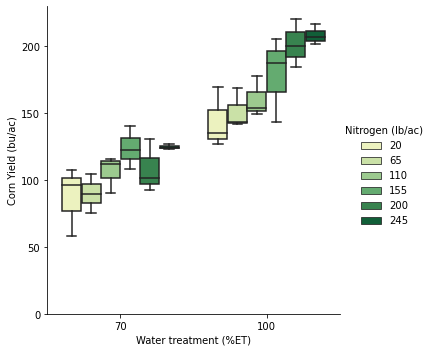

In [5]:
sns.catplot(x = 'Water treatment (%ET)', y = 'Corn Yield (bu/ac)', hue = 'Nitrogen (lb/ac)', 
            kind='box', data = data_renamed, palette = 'YlGn')
plt.ylim([0,230])
plt.savefig('../Figures/Yield/grain_yield.jpg', bbox_inches = 'tight', type = 'jpg', dpi = 300)

In [11]:
# normality test
# Plot residuals
stat, p = shapiro(data_renamed['Yield'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.963, p=0.264
Sample looks Gaussian (fail to reject H0)


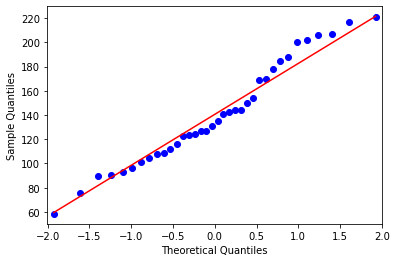

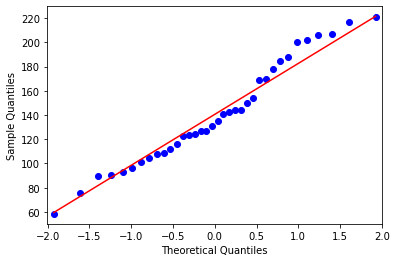

In [13]:
sm.qqplot(data_renamed['Yield'], line = 's')

In [15]:
model = ols('Yield ~ C(Nitrogen) + C(Water) + C(Nitrogen):C(Water)', data=data_renamed).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Nitrogen),12448.806532,5.0,7.280908,2.830548e-04
C(Water),40933.444356,1.0,119.703293,8.253432e-11
C(Nitrogen):C(Water),2121.915787,5.0,1.241040,3.211410e-01
Residual,8206.981089,24.0,NaN,NaN
